# Make contour plot

There are no calculations in here.  Just run the following to make the final plot.  It fetches other experiment's data points from a Brown server.

In [1]:
from __future__ import print_function
%matplotlib inline
import functools
import xmltodict
import matplotlib.pyplot as plt
import urllib.request

Put your measured values here.

In [2]:
# Dummy values
limit_mass =  [4.0, 4.7832526980016086, 5.7198765932349147, 6.8399037867067873, 8.1792470604591649, 9.7808513923907547, 11.696070952851464, 13.986315735311257, 16.725020619007473, 20.000000000000004]
limit_sec =  [1.156711536220387e-40, 3.369993100236127e-41, 6.1433325591284763e-41, 2.432026877716373e-42, 4.4647624510482575e-42, 6.7228565033385184e-42, 2.7832706014745588e-42, 3.1749213042270298e-42, 1.2028678308143476e-42, 2.486997049325243e-42]

In [3]:
@functools.lru_cache()
def p(code):
    auth_handler = urllib.request.HTTPBasicAuthHandler()
    auth_handler.add_password(realm='Web Password',
                           uri=r'http://dmtools.brown.edu:8080/',
                           user='user292929',
                           passwd='somepassword')
    opener =  urllib.request.build_opener(auth_handler)
    urllib.request.install_opener(opener)
    res = opener.open(r'http://dmtools.brown.edu:8080/limits/%d.xml' % code)
    nodes = res.read()
    text = nodes.decode('utf-8')
    
    x = xmltodict.parse(text)
    data_clean = x['limit']['data-values'].replace('{', '')
    data_clean = data_clean.replace('}', '')
    data_clean = data_clean.replace('[', '')
    data_clean = data_clean.replace(']', '')
    data_clean = data_clean.split(',')[0]#replace(',', ';')

    data_dict = dict(x['limit'])
    assert data_dict['y-units'] == 'cm^2'
    assert data_dict['x-units'] == 'GeV'
    data_dict['mass'] = []
    data_dict['xsec'] = []

    for point in data_clean.split(';'):
        x,y = list(map(float, point.split()))
        
        y *= float(data_dict['y-rescale'])
        
        data_dict['mass'].append(x)
        data_dict['xsec'].append(y)
    del data_dict['data-values']
        
    return data_dict

In [4]:
def plot_contour(x, y,
                 mass_min, mass_max,
                 xsec_min, xsec_max,
                 mass_steps,
                 log=True):  
    fig, ax = plt.subplots(figsize=[5,4])
    plt.plot(x,y, '--', label='This work (XENON100 225 days)')

    plt.xlabel('WIMP mass [GeV/$c^2$]')
    plt.ylabel('WIMP-nucleon cross section [cm$^2$]')
    
    discovery = []
    
    # Dama/Libra
    #etc.append(p(229)) # 3 sig, no ion
    #experiments_to_compare.append(p(235)) # 5 sig, no ion
    #experiments_to_compare.append(p(230)) # 3 sig, no ion
    #experiments_to_compare.append(p(236)) # 5 sig, no ion
    
    # Cogent
    discovery.append([p(688), {'hatch' : '|', 'color' : 'g'}]) # CoGeNT, 2013, PHYSICAL REVIEW D 88, 012002 (2013) arXiv:1208.5737v3
    #discovery.append([p(726), {'hatch' : '|', 'color' : 'g'}]) # CoGeNT, 2014, 90% C.L. M.L.+ floating sys.
    #etc.append(p(724)) # CoGeNT, 2014, 90% C.L. maximum likelihood
    
    # CRESST II (2011)
    style = {'hatch' : '\\', 'color' : 'r', 'label':'CRESST II (2011),  730kg-d, 2-sig.'}
    discovery.append([p(480), style])  # 2 sigma, pt1
    style['label'] = None
    discovery.append([p(481), style])  # 2 sigma, pt2
    #etc.append(p(479))  # 1 sigma
    
    #CDMS-II Si, 1304.4279
    #etc.append(p(690))  # Centroid
    #etc.append(p(652))  # 99%
    discovery.append([p(653), {'hatch' : '/', 'color' : 'b'}])  # 99%
    
    for data, style in discovery:
        label = data['data-label']
        if 'label' in style:
            label = style['label']
        
        plt.fill(data['mass'],
                 data['xsec'],
                 color=style['color'],
                 alpha=0.2,
                 hatch=style['hatch'],
                 #fill=False,
                 label=label)
        print(data['experiment'])
        print('\tLabel:', data['data-label'])
        print('\tRef:', data['data-reference'])
    
    etc = []
    
    etc.append({'mass' : (1.414, 1.448, 1.482, 1.517, 1.553, 1.59, 1.628, 1.666, 1.706, 1.746, 1.788,
                         1.83, 1.874, 1.918, 1.964, 2.01, 2.058, 2.107, 2.157, 2.208, 2.261, 2.314,
                         2.369, 2.426, 2.483, 2.542, 2.602, 2.664, 2.727, 2.792, 2.858, 2.926, 2.996,
                         3.067, 3.14, 3.214, 3.291, 3.369, 3.449, 3.53, 3.614, 3.7, 3.788, 3.878, 3.97,
                         4.064, 4.161, 4.259, 4.36, 4.464, 4.57, 4.678, 4.789, 4.903, 5.02, 5.139,
                         5.261, 5.386, 5.513, 5.644, 5.778, 5.915, 6.056, 6.2, 6.347, 6.497, 6.652,
                         6.81, 6.971, 7.137, 7.306, 7.48, 7.657, 7.839, 8.025, 8.216, 8.411, 8.61,
                         8.815, 9.024, 9.238, 9.457, 9.682, 9.912, 10.147, 10.388, 10.634, 10.887,
                         11.145, 11.41, 11.681, 11.958, 12.242, 12.533, 12.83, 13.135, 13.446, 13.766,
                         14.092, 14.427, 14.769, 15.12),
                'xsec' : (1.025e-37, 6.683e-38, 3.352e-38, 2.047e-38, 1.357e-38, 8.855e-39, 5.682e-39,
                         3.768e-39, 2.582e-39, 1.799e-39, 1.295e-39, 9.322e-40, 6.822e-40, 5.075e-40,
                         3.838e-40, 3e-40, 2.383e-40, 1.989e-40, 1.66e-40, 1.386e-40, 1.176e-40,
                         1.031e-40, 8.891e-41, 7.796e-41, 6.836e-41, 6.093e-41, 5.431e-41, 4.921e-41,
                         4.315e-41, 3.91e-41, 3.661e-41, 3.317e-41, 3.056e-41, 2.815e-41, 2.635e-41,
                         2.468e-41, 2.349e-41, 2.2e-41, 2.129e-41, 2.026e-41, 1.929e-41, 1.866e-41,
                         1.806e-41, 1.748e-41, 1.691e-41, 1.636e-41, 1.584e-41, 1.584e-41, 1.532e-41,
                         1.532e-41, 1.483e-41, 1.483e-41, 1.435e-41, 1.435e-41, 1.435e-41, 1.435e-41,
                         1.412e-41, 1.388e-41, 1.344e-41, 1.3e-41, 1.3e-41, 1.258e-41, 1.198e-41,
                         1.14e-41, 1.085e-41, 1.033e-41, 9.833e-42, 9.359e-42, 9.057e-42, 8.764e-42,
                         8.481e-42, 8.073e-42, 7.812e-42, 7.685e-42, 7.437e-42, 7.196e-42, 6.963e-42,
                         6.737e-42, 6.52e-42, 6.309e-42, 6.206e-42, 6.105e-42, 5.908e-42, 5.811e-42,
                         5.717e-42, 5.532e-42, 5.443e-42, 5.353e-42, 5.266e-42, 5.181e-42, 5.181e-42,
                         5.012e-42, 5.012e-42, 4.931e-42, 4.851e-42, 4.851e-42, 4.851e-42, 4.851e-42,
                         4.771e-42, 4.771e-42, 4.771e-42, 4.771e-42),
                'data-label' : 'CDMSlite 70 kg-d 56 eV',
                'experiment' : 'CDMSlite',
                'data-reference' : '1509.02448' })
    
    # Xenon
    etc.append(p(764))  # Xe10, S2
    #etc.append(p(636)) # Xe1T @ snowmass
    
    # LUX
    #etc.append(p(701))  # LUX (2013) 85d 118kg (SI, 90% CL)
    etc.append(p(706))  # LUX (2013) 85d 118kg (SI, 99% CL)
    
    etc.append(p(746))  # SuperCDMS Soudan LT, 90% C.L.
    
    etc.append(p(862))  # CRESST
    
    
    
    for data in etc:
        #print(data)
        plt.plot(data['mass'],
                 data['xsec'],
                 label=data['data-label'])
        print(data['experiment'])
        print('\tLabel:', data['data-label'])
        print('\tRef:', data['data-reference'])

    if log:
        plt.loglog()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.xticks([4, 5, 6, 7, 8, 9, 10, 20], [4, 5, 6, 7, 8, 9, 10, 20])

    plt.xlim((mass_min, mass_max))
    plt.ylim((xsec_min, xsec_max))
    
    for extension in ['png', 'eps']:
        plt.savefig('limit_contour_log%s.%s' % (str(log), extension),
                    bbox_inches='tight')
    plt.show()



Actual work happens here:

CoGeNT
	Label: CoGeNT, 2013, WIMP region of interest, SI
	Ref: PHYSICAL REVIEW D 88, 012002 (2013) arXiv:1208.5737v3
CRESST II
	Label: CRESST II (2011),  730kg-d, 2-sig. allowed region, SI pt. 1
	Ref: arXiv:<a href="http://arxiv.org/abs/1109.0702">1109.0702</a>
CRESST II
	Label: CRESST II (2011), 730kg-d, 2-sig. , SI pt. 2
	Ref: arXiv:<a href="http://arxiv.org/abs/1109.0702">1109.0702</a>
CDMS II (Soudan)
	Label: CDMSII-Si (Silicon), c58 95% CL , SI (2013)
	Ref: arXiv: <a href="http://arxiv.org/abs/1304.4279">1304.4279</a>
CDMSlite
	Label: CDMSlite 70 kg-d 56 eV
	Ref: 1509.02448
XENON10
	Label: XENON10, 2011, S2-only search - corrected
	Ref: PRL 107,051301 (2011)
LUX
	Label: LUX (2013) 85d 118kg (SI, 95% CL)
	Ref: arXiv:1310.8214
SuperCDMS
	Label: SuperCDMS Soudan LT, 90% C.L.
	Ref: Search for Low Mass WIMPs with SuperCDMS.  <a href = "http://arxiv.org/abs/1402.7137">arXiv:1402.7137</a>
CRESST II
	Label: CRESST-II 2015 SI 90% C.L.
	Ref: arXiv: <a href="http://arxiv.org/pdf/1509.01515v1

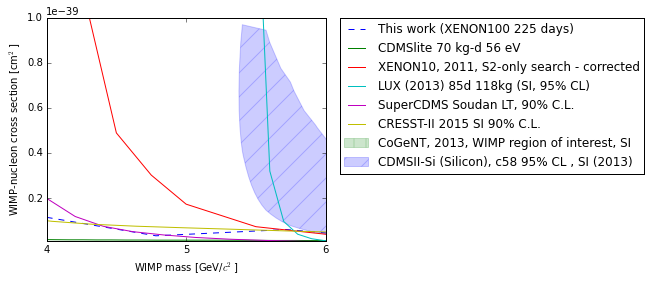

In [5]:
plot_contour(limit_mass, limit_sec,
             xsec_max= 1e-39,
             xsec_min= 1e-41,
             mass_max= 6,
             mass_min= 4,
             mass_steps= 50,
             log=False)

CoGeNT
	Label: CoGeNT, 2013, WIMP region of interest, SI
	Ref: PHYSICAL REVIEW D 88, 012002 (2013) arXiv:1208.5737v3
CRESST II
	Label: CRESST II (2011),  730kg-d, 2-sig. allowed region, SI pt. 1
	Ref: arXiv:<a href="http://arxiv.org/abs/1109.0702">1109.0702</a>
CRESST II
	Label: CRESST II (2011), 730kg-d, 2-sig. , SI pt. 2
	Ref: arXiv:<a href="http://arxiv.org/abs/1109.0702">1109.0702</a>
CDMS II (Soudan)
	Label: CDMSII-Si (Silicon), c58 95% CL , SI (2013)
	Ref: arXiv: <a href="http://arxiv.org/abs/1304.4279">1304.4279</a>
CDMSlite
	Label: CDMSlite 70 kg-d 56 eV
	Ref: 1509.02448
XENON10
	Label: XENON10, 2011, S2-only search - corrected
	Ref: PRL 107,051301 (2011)
LUX
	Label: LUX (2013) 85d 118kg (SI, 95% CL)
	Ref: arXiv:1310.8214
SuperCDMS
	Label: SuperCDMS Soudan LT, 90% C.L.
	Ref: Search for Low Mass WIMPs with SuperCDMS.  <a href = "http://arxiv.org/abs/1402.7137">arXiv:1402.7137</a>
CRESST II
	Label: CRESST-II 2015 SI 90% C.L.
	Ref: arXiv: <a href="http://arxiv.org/pdf/1509.01515v1

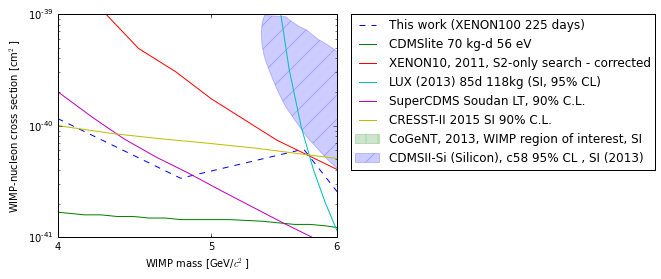

In [6]:
plot_contour(limit_mass, limit_sec,
             xsec_max= 1e-39,
             xsec_min= 1e-41,
             mass_max= 6,
             mass_min= 4,
             mass_steps= 50,
             log=True)

CoGeNT
	Label: CoGeNT, 2013, WIMP region of interest, SI
	Ref: PHYSICAL REVIEW D 88, 012002 (2013) arXiv:1208.5737v3
CRESST II
	Label: CRESST II (2011),  730kg-d, 2-sig. allowed region, SI pt. 1
	Ref: arXiv:<a href="http://arxiv.org/abs/1109.0702">1109.0702</a>
CRESST II
	Label: CRESST II (2011), 730kg-d, 2-sig. , SI pt. 2
	Ref: arXiv:<a href="http://arxiv.org/abs/1109.0702">1109.0702</a>
CDMS II (Soudan)
	Label: CDMSII-Si (Silicon), c58 95% CL , SI (2013)
	Ref: arXiv: <a href="http://arxiv.org/abs/1304.4279">1304.4279</a>
CDMSlite
	Label: CDMSlite 70 kg-d 56 eV
	Ref: 1509.02448
XENON10
	Label: XENON10, 2011, S2-only search - corrected
	Ref: PRL 107,051301 (2011)
LUX
	Label: LUX (2013) 85d 118kg (SI, 95% CL)
	Ref: arXiv:1310.8214
SuperCDMS
	Label: SuperCDMS Soudan LT, 90% C.L.
	Ref: Search for Low Mass WIMPs with SuperCDMS.  <a href = "http://arxiv.org/abs/1402.7137">arXiv:1402.7137</a>
CRESST II
	Label: CRESST-II 2015 SI 90% C.L.
	Ref: arXiv: <a href="http://arxiv.org/pdf/1509.01515v1

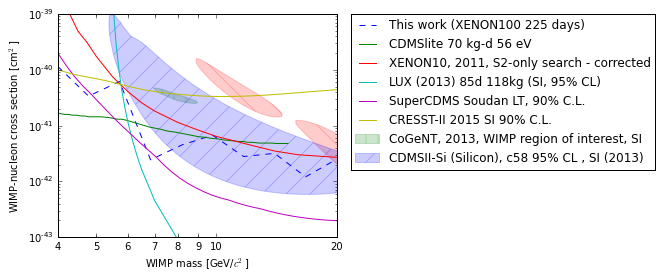

In [7]:
plot_contour(limit_mass, limit_sec,
             xsec_max= 1e-39,
             xsec_min= 1e-43,
             mass_max= 20,
             mass_min= 4,
             mass_steps= 50,
             log=True)